In [180]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Wczytanie danych

In [165]:
df = pd.read_csv('sentiment_movies.csv', encoding = "ISO-8859-1")
df.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


### Analiza zbioru danych

Text(0.5, 0, 'klasa')

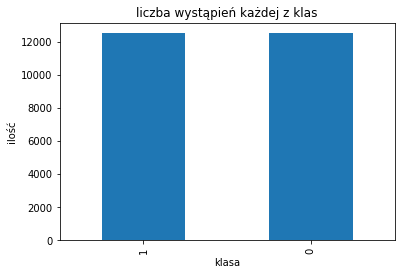

In [166]:
ax = df['Sentiment'].value_counts().plot(kind='bar')
ax.set_title("liczba wystąpień każdej z klas")
ax.set_ylabel("ilość")
ax.set_xlabel("klasa")

In [190]:
# Wypisanie przykladowej recenzji
df.loc[1234, 'SentimentText'] 

'Alright, admit never seen "Rhoda" one two episodes "The Mary Tyler Moore Show." Even though don\'t know anything duo comedic talent, still liked movie lot.<br /><br />Mary goes back work. Rose tries luck comedian. Rhoda struggles photography career. Meredith...what exactly again? three stories follow two hours amusing entertaining way. two long time friends reunite, makes film better. <br /><br />I surprised good writing was. little jokes thrown Mary Rhoda funny. script well put together.<br /><br />I seen Moore Harper movies past years thought good. idea worked well team. actresses share fulfill title movie, never seem let down. (During run movie.) Joie Lenz Marisa Ryan play roles okay nothing great. rest cast like Jonah, Cecile and....everybody else also works well together.<br /><br />Being reunion, would expect fan either show enjoy this. non-fan still enjoyed little get-together. Good story lines character two main characters makes film good. (The newer version MTM theme song doe

### Procesowanie tekstu

#### Czyszczenie 
Jak widac powyzej dane posiadaja znaki specjalne html, ktore nalezy usunac. W celu wyciagniecia z danych tylko slow trzeba usunac rowniez znaki takie jak "." "!" "?" itp.

In [170]:
# Zastapienie znakow spacjami:
df['SentimentText_cleaned'] = df['SentimentText'].apply(lambda x: re.sub("(<br\s*/><br\s*/>)|(\-)|(\/)", " ", x))
df['SentimentText_cleaned'] = df['SentimentText_cleaned'].apply(lambda x: x.replace("_", " "))
# Usuniecie znakow specjalnych:
df['SentimentText_cleaned'] = df['SentimentText_cleaned'].apply(lambda x: re.sub("[\W]+", ' ', x))
# Zamiana wszystkich liter na male:
df['SentimentText_cleaned'] = df['SentimentText_cleaned'].apply(lambda x: x.lower())

In [169]:
#usuniecie cyfr
df['SentimentText_cleaned'] = df['SentimentText_cleaned'].apply(lambda x: re.sub("\d+", ' ', x))

In [191]:
# przykladowa recencja po wstepnym oczyszczeniu
df.loc[1234, 'SentimentText_cleaned'] 

'alright admit never seen rhoda one two episodes the mary tyler moore show even though don t know anything duo comedic talent still liked movie lot mary goes back work rose tries luck comedian rhoda struggles photography career meredith what exactly again three stories follow two hours amusing entertaining way two long time friends reunite makes film better i surprised good writing was little jokes thrown mary rhoda funny script well put together i seen moore harper movies past years thought good idea worked well team actresses share fulfill title movie never seem let down during run movie joie lenz marisa ryan play roles okay nothing great rest cast like jonah cecile and everybody else also works well together being reunion would expect fan either show enjoy this non fan still enjoyed little get together good story lines character two main characters makes film good the newer version mtm theme song doesn t hurt either '

#### Usuniecie 'stop-words'
Usuniecie bardzo popularnych slow takich jak "i", "jesli", "ona", które nic nie wnosza.

In [171]:
english_stop_words = stopwords.words('english')

In [172]:
# przyklady angielskig 'stop-words':
english_stop_words[::40]

['i', 'that', 'through', 'own', 'ma']

In [176]:
df['SentimentText_cleaned_no_stops'] = df['SentimentText_cleaned'].apply(lambda x:
                                                                          ' '.join([word for word in x.split() 
                                                                                    if word not in english_stop_words]))

In [192]:
# recenzja po usunieciu 'stop-words':
df.loc[1234, 'SentimentText_cleaned_no_stops'] 

'alright admit never seen rhoda one two episodes mary tyler moore show even though know anything duo comedic talent still liked movie lot mary goes back work rose tries luck comedian rhoda struggles photography career meredith exactly three stories follow two hours amusing entertaining way two long time friends reunite makes film better surprised good writing little jokes thrown mary rhoda funny script well put together seen moore harper movies past years thought good idea worked well team actresses share fulfill title movie never seem let run movie joie lenz marisa ryan play roles okay nothing great rest cast like jonah cecile everybody else also works well together reunion would expect fan either show enjoy non fan still enjoyed little get together good story lines character two main characters makes film good newer version mtm theme song hurt either'

#### normalizacja (steemming) slow 
Steeming to proces usuniecia ze slowa koncowki fleksyjnej pozostawiajac tylko temat wyrazu.
W celu uzyskania lepszych wynikow przetestuje 2 algorytmy: Porter oraz Snowball.

In [183]:
porter = PorterStemmer()
df['SentimentText_porter'] = df['SentimentText_cleaned_no_stops'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

In [193]:
# recenzja po normalizacji z uzyciem algorytmu Portera:
df.loc[1234, 'SentimentText_porter'] 

'alright admit never seen rhoda one two episod mari tyler moor show even though know anyth duo comed talent still like movi lot mari goe back work rose tri luck comedian rhoda struggl photographi career meredith exactli three stori follow two hour amus entertain way two long time friend reunit make film better surpris good write littl joke thrown mari rhoda funni script well put togeth seen moor harper movi past year thought good idea work well team actress share fulfil titl movi never seem let run movi joie lenz marisa ryan play role okay noth great rest cast like jonah cecil everybodi els also work well togeth reunion would expect fan either show enjoy non fan still enjoy littl get togeth good stori line charact two main charact make film good newer version mtm theme song hurt either'

In [184]:
snowball = SnowballStemmer(language='english')
df['SentimentText_snowball'] = df['SentimentText_cleaned_no_stops'].apply(lambda x: ' '.join([snowball.stem(word) for word in x.split()]))

In [194]:
# recenzja po normalizacji z uzyciem algorytmu snowball:
df.loc[1234, 'SentimentText_snowball'] 

'alright admit never seen rhoda one two episod mari tyler moor show even though know anyth duo comed talent still like movi lot mari goe back work rose tri luck comedian rhoda struggl photographi career meredith exact three stori follow two hour amus entertain way two long time friend reunit make film better surpris good write littl joke thrown mari rhoda funni script well put togeth seen moor harper movi past year thought good idea work well team actress share fulfil titl movi never seem let run movi joie lenz marisa ryan play role okay noth great rest cast like jonah cecil everybodi els also work well togeth reunion would expect fan either show enjoy non fan still enjoy littl get togeth good stori line charact two main charact make film good newer version mtm theme song hurt either'

## Zamian recenzji na wektory oraz testowanie przeprocesowanych danych

In [195]:
df.columns

Index(['SentimentText', 'Sentiment', 'SentimentText_cleaned',
       'SentimentText_preprocessed_no_stops', 'SentimentText_cleaned_no_stops',
       'SentimentText_porter', 'SentimentText_snowball'],
      dtype='object')

In [200]:
X_all = list(df.drop(columns=['Sentiment']).columns)
y = df.Sentiment

['SentimentText',
 'SentimentText_cleaned',
 'SentimentText_preprocessed_no_stops',
 'SentimentText_cleaned_no_stops',
 'SentimentText_porter',
 'SentimentText_snowball']

In [234]:
#np.mean(cv_dict['SentimentText'])
{key: np.mean(value) for key, value in cv_dict.items()}


{'SentimentText': 0.8808,
 'SentimentText_cleaned': 0.88116,
 'SentimentText_cleaned_no_stops': 0.8814,
 'SentimentText_porter': 0.87836,
 'SentimentText_snowball': 0.87836}

<BarContainer object of 5 artists>

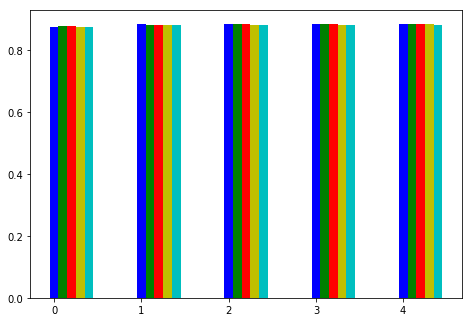

In [227]:
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.0, cv_dict['SentimentText'], color = 'b', width = 0.10)
ax.bar(X + 0.10, cv_dict['SentimentText_cleaned'], color = 'g', width = 0.10)
ax.bar(X + 0.20, cv_dict['SentimentText_cleaned_no_stops'], color = 'r', width = 0.10)
ax.bar(X + 0.30, cv_dict['SentimentText_porter'], color = 'y', width = 0.10)
ax.bar(X + 0.40, cv_dict['SentimentText_snowball'], color = 'c', width = 0.10)
# ax.bar(X + 0.30, data[1], color = 'g', width = 0.25)
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [203]:
cv_dict = {}
for x in X_all:
    X = df[x]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    cv = CountVectorizer(binary=True, ngram_range=(1, 2))
    cv.fit(X_train)
    X_train = cv.transform(X_train)
    X_test = cv.transform(X_test)
    acc = []
    for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
        lr = LogisticRegression(C=c)
        lr.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, lr.predict(X_test))
#         print ("Accuracy for C=%s: %s" 
#                % (c, accuracy_score(y_test, lr.predict(X_test))))
        acc.append(accuracy)
    cv_dict[x] = acc
        

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train = tfidf_vectorizer.transform(X_train)
#X_test = tfidf_vectorizer.transform(X_test)

In [235]:
tf_dict = {}
for x in X_all:
    X = df[x]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    cv = TfidfVectorizer()
    cv.fit(X_train)
    X_train = cv.transform(X_train)
    X_test = cv.transform(X_test)
    acc = []
    for c in [0.01, 0.05, 0.25, 0.5, 1, 10, ]:
    
        lr = LogisticRegression(C=c)
        lr.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, lr.predict(X_test))
#         print ("Accuracy for C=%s: %s" 
#                % (c, accuracy_score(y_test, lr.predict(X_test))))
        acc.append(accuracy)
    tf_dict[x] = acc

In [237]:
{key: np.mean(value) for key, value in tf_dict.items()}

{'SentimentText': 0.85612,
 'SentimentText_cleaned': 0.85808,
 'SentimentText_preprocessed_no_stops': 0.8588000000000001,
 'SentimentText_cleaned_no_stops': 0.8588000000000001,
 'SentimentText_porter': 0.8588000000000001,
 'SentimentText_snowball': 0.8598800000000001}

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
X_train = X_train.apply(lambda x: x.split(' '))

In [162]:
cv = CountVectorizer(binary=True, ngram_range=(1, 2))
cv.fit(X_train)
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

AttributeError: 'list' object has no attribute 'lower'

In [156]:
X_train[100].toarray()[0][2000:3000]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [33]:
# after processing
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8718
Accuracy for C=0.05: 0.8764
Accuracy for C=0.25: 0.8758
Accuracy for C=0.5: 0.8744
Accuracy for C=1: 0.8698


In [42]:
# delete html signs and stopwords
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8724
Accuracy for C=0.05: 0.8772
Accuracy for C=0.25: 0.8744
Accuracy for C=0.5: 0.873
Accuracy for C=1: 0.8708


In [51]:
# delete html signs and stopwords, lowercase and all special marks
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.873
Accuracy for C=0.05: 0.8772
Accuracy for C=0.25: 0.8736
Accuracy for C=0.5: 0.8704
Accuracy for C=1: 0.8678


In [57]:
# delete html signs and stopwords, lowercase and all special marks, delete _
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.873
Accuracy for C=0.05: 0.8774
Accuracy for C=0.25: 0.8736
Accuracy for C=0.5: 0.8702
Accuracy for C=1: 0.8678


In [64]:
# delete html signs and stopwords, lowercase and all special marks, delete _ and digits
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8732
Accuracy for C=0.05: 0.8784
Accuracy for C=0.25: 0.8756
Accuracy for C=0.5: 0.8706
Accuracy for C=1: 0.8682


In [78]:
# delete html signs and stopwords, lowercase and all special marks, delete _ and digits, porter
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

C:\anaconda37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.867
Accuracy for C=0.05: 0.8738
Accuracy for C=0.25: 0.8724
Accuracy for C=0.5: 0.871
Accuracy for C=1: 0.8666


In [95]:
# delete html signs and stopwords, lowercase and all special marks, delete _ and digits, porter, ngram = 3
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8728
Accuracy for C=0.05: 0.879
Accuracy for C=0.25: 0.881
Accuracy for C=0.5: 0.8808
Accuracy for C=1: 0.8812


In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train = tfidf_vectorizer.transform(X_train)
#X_test = tfidf_vectorizer.transform(X_test)

AttributeError: 'list' object has no attribute 'lower'

In [111]:
# delete html signs and stopwords, lowercase and all special marks, delete _ and digits, porter, ngram = 3
for c in [0.01, 0.05, 0.25, 0.5, 1, 2, 3]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8068
Accuracy for C=0.05: 0.8442
Accuracy for C=0.25: 0.8684
Accuracy for C=0.5: 0.8784
Accuracy for C=1: 0.8828
Accuracy for C=2: 0.8846
Accuracy for C=3: 0.886


In [119]:
# delete html signs and stopwords, lowercase and all special marks, delete _ and digits, porter, ngram = 3
for c in [0.01, 0.05, 0.25, 0.5, 1, 2, 3]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

C:\anaconda37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=0.01: 0.8174
Accuracy for C=0.05: 0.845
Accuracy for C=0.25: 0.8692
Accuracy for C=0.5: 0.8778
Accuracy for C=1: 0.881
Accuracy for C=2: 0.8848
Accuracy for C=3: 0.8866


In [128]:
# delete html signs and stopwords, lowercase and all special marks, delete _ and digits, porter, ngram = 3
for c in [0.01, 0.05, 0.25, 0.5, 1, 2, 3]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.8186
Accuracy for C=0.05: 0.8458
Accuracy for C=0.25: 0.8702
Accuracy for C=0.5: 0.8764
Accuracy for C=1: 0.8842
Accuracy for C=2: 0.8894
Accuracy for C=3: 0.8882
